In [ ]:
!python installer.py

In [20]:
import sys 

sys.path.insert(1, 'My_libs/')

import IDmeter
import importlib
importlib.reload(IDmeter)

import Plot_figures
import importlib
importlib.reload(Plot_figures)

import Download_data
import importlib
importlib.reload(Download_data)

import collections
import numpy as np
import matplotlib.pyplot as plt

# READ ME

In the following code we reproduce Figs. 4A, B, C of the main text of our article titled "The intrinsic dimension of gene expression during cell differentiation".

In this code, we reproduce the steps of our analysis, from the raw data to the plot of the intrinsic dimension (ID) trend.
It is important to note that we do not report here the preliminary step consisting in arranging the data into an *anndata* object *adata*, stored in a *h5ad* file. 

*adata* essentially stores two objects:
- the **counts** matrix in *adata.X*
- a dataframe containing metadata about single cells in *adata.obs*. For the following results, the necessary piece of information consists in the **cell-type** of each cell (*celltype* column), reconstructed by the authors of the corresponding paper.

For transparency, for each dataset, we specify the online repository that gives free access to the original data. 

# Hydra interstitial layer

The original dataset is available on GEO repository (GSE121617).

From the metadata they supply, we took the column named "Cluster" and renamed it *cell-type* in *adata.obs*. Cell-types beginning with 'i_' belongs to intersitial layer. We only considered cell-types represented by more than 400 cells, namely: 'i_SC/prog', 'i_nc_prog', 'i_nc_gc_prog', 'i_nb3', 'i_nb4', 'i_nem', 'i_n_ec1', 'i_n_ec2', 'i_mgl', 'i_gmgc', 'i_smgc2', 'i_zmg1'. 

### Download data

In [21]:
dataset_name = "Hydra"
data_file_folder = '/home/niccolo/Desktop/Waddington ID/Codici/Hydra/Data/'

mtx, df, genes_name = Download_data.download_dataset(dataset_name,
                                                  data_file_folder, 
                                                  verbose = True)

Welcome to HYDRA dataset!
Metadata in a dataframe with shape (24984, 6)
scRNA-seq data in a counts matrix with shape ((24984, 37114))

Quality control on cells...
In order to follow the quality control of the paper:
 - cells with less than 200, or more than 8000 expressed genes were deleted (0
 - cells with size greater than 400 and smaller than 70000. 0 deleted.
 - cells with mitochondrial gene-expression fractions greater than 5.0% (0) were deleted

Genes selection...
Cannot select protein-coding genes because they are not available for Hydra in Ensembl database
Deleting genes because full of zeros

Normalization of the counts matrix...

scRNA-seq data in csr matrix with shape ((24984, 36814))
Metadata in a dataframe with columns ['cell', 'nGene', 'nUMI', 'origin_ident', 'celltype', 'GT']


### ID measure

In [22]:
labels = np.array(['i_SC/prog', 'i_nc_prog', 'i_nc_gc_prog', 
                   'i_nb3', 'i_nb4', 'i_nem', 
                   'i_n_ec1', 'i_n_ec2', 'i_mgl', 'i_gmgc', 
                   'i_smgc2', 'i_zmg1'])

In [23]:
selected_cts = np.array([ct for ct in df.celltype.values if ct in labels])
celltypes_dict = dict(collections.Counter(selected_cts))

celltypes_dict = dict(sorted(celltypes_dict.items(), key=lambda item: item[1]))
n_subsampled_cells = int(list(celltypes_dict.values())[0]*0.75)

print("Number of cells per cell-type:", celltypes_dict)
print("From each cell-type we will sub-sample", n_subsampled_cells, "cells")

Number of cells per cell-type: {'i_n_ec2': 442, 'i_nb4': 457, 'i_n_ec1': 478, 'i_nb3': 529, 'i_mgl': 535, 'i_zmg1': 537, 'i_nem': 549, 'i_gmgc': 560, 'i_nc_gc_prog': 567, 'i_smgc2': 618, 'i_nc_prog': 717, 'i_SC/prog': 1879}
From each cell-type we will sub-sample 331 cells


In [24]:
dataset_name = "Hydra"
labeling = "Celltype"
n_subsamplings = 3

results_dict = IDmeter.ID(dataset_name, labeling, 
                        labels, df, mtx, genes_name, 
                        n_subsamplings = n_subsamplings, 
                        verbose = False)

Settings:
Dataset Hydra
Celltype-based grouping of cells
Labels: ['i_SC/prog' 'i_nc_prog' 'i_nc_gc_prog' 'i_nb3' 'i_nb4' 'i_nem' 'i_n_ec1'
 'i_n_ec2' 'i_mgl' 'i_gmgc' 'i_smgc2' 'i_zmg1']
3 independent sub-samplings
Counts matrix dimension=(24984, 36814)


Subsampling number 1 , with seed: 10931. i_SC/prog ID = 36.4 - i_nc_prog ID = 48.6 - i_nc_gc_prog ID = 36.9 - i_nb3 ID = 15.2 - i_nb4 ID = 22.0 - i_nem ID = 20.6 - i_n_ec1 ID = 24.7 - i_n_ec2 ID = 22.9 - i_mgl ID = 26.8 - i_gmgc ID = 10.7 - i_smgc2 ID = 13.7 - i_zmg1 ID = 9.9 - 


Subsampling number 2 , with seed: 196869. i_SC/prog ID = 34.5 - i_nc_prog ID = 46.0 - i_nc_gc_prog ID = 36.2 - i_nb3 ID = 15.6 - i_nb4 ID = 26.0 - i_nem ID = 20.1 - i_n_ec1 ID = 25.1 - i_n_ec2 ID = 23.3 - i_mgl ID = 26.5 - i_gmgc ID = 11.8 - i_smgc2 ID = 14.0 - i_zmg1 ID = 9.3 - 


Subsampling number 3 , with seed: 911494. i_SC/prog ID = 34.1 - i_nc_prog ID = 43.1 - i_nc_gc_prog ID = 39.1 - i_nb3 ID = 17.8 - i_nb4 ID = 23.2 - i_nem ID = 18.8 - i_n_ec1 ID = 2

### Plot

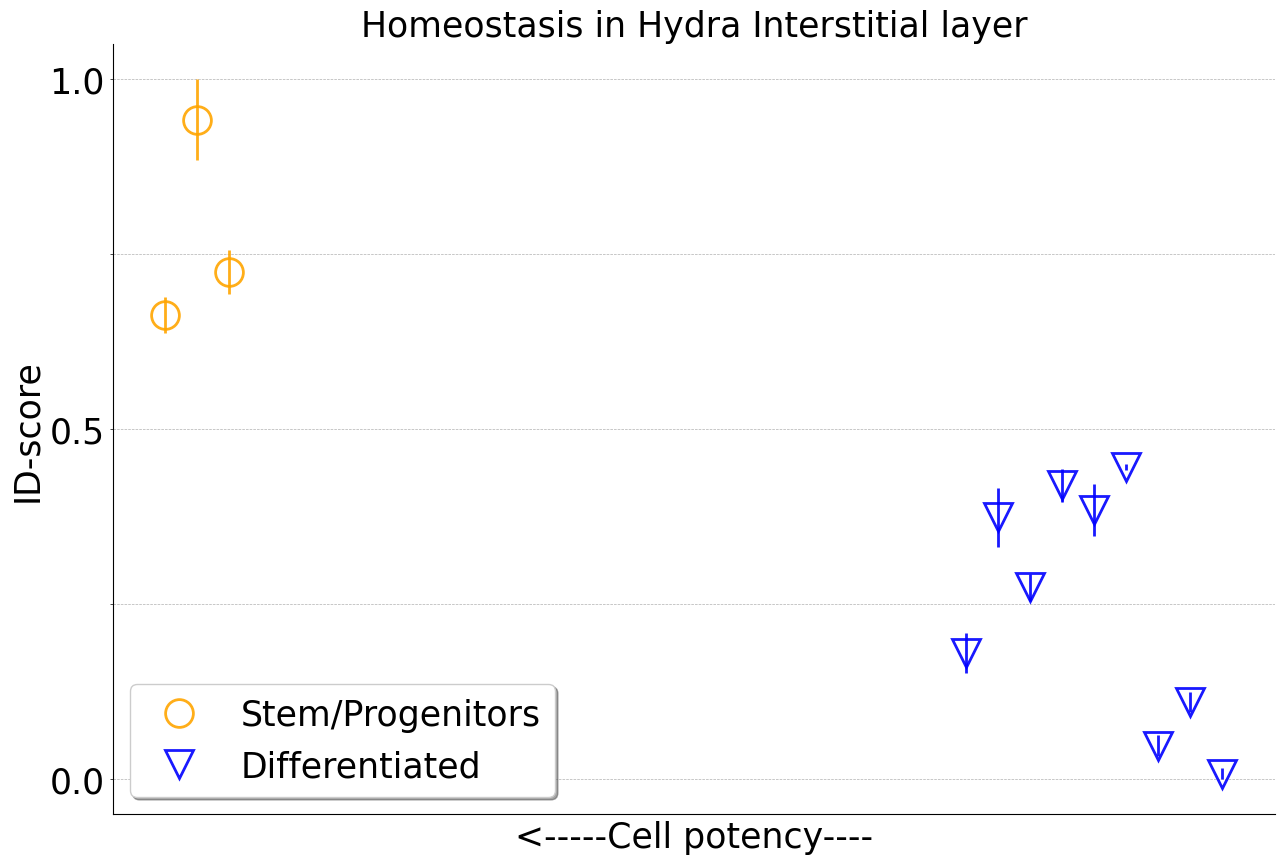

In [25]:
x = results_dict['Mean trend']['Labels']
y = results_dict['Mean trend']['Mean']
y_err = results_dict['Mean trend']['Std']

plot_params = {"label_size": 25, "markersize": 20,
                "linewidth": 4, "linestyle": ' ',
                "alpha": 0.9, "markeredgewidth": 2,
                "ticks_length": 2, "ticks_width": 0.5,
                "f_legend": 1}

fig, ax = plt.subplots(figsize = (15, 10))


title = 'Homeostasis in Hydra Interstitial layer'
celltype_group1 = labels = np.array(['i_SC/prog', 
                                     'i_nc_prog', 
                                     'i_nc_gc_prog'])
x_val = np.arange(1, len(celltype_group1)+1)
label = 'Stem/Progenitors'
plot_params['marker'] = 'o'
plot_params['color'] = 'orange'
Plot_figures.plot_lineage_trend(ax, x_val, x, y, y_err, label, 
                                celltype_group1, dataset_name, 
                                title = title, plot_params = plot_params)

lineage_shift = 25

celltype_group2 = labels = np.array(['i_nb3', 'i_nb4', 'i_nem', 
                                    'i_n_ec1', 'i_n_ec2', 'i_mgl', 'i_gmgc', 
                                    'i_smgc2', 'i_zmg1'])
x_val = np.arange(1, len(celltype_group2)+1)+lineage_shift
label = 'Differentiated'
plot_params['marker'] = 'v'
plot_params['color'] = 'blue'
Plot_figures.plot_lineage_trend(ax, x_val, x, y, y_err, label, 
                                celltype_group2, dataset_name, 
                                title = title, plot_params = plot_params)

# Hydra endodermal layer

The original dataset is available on GEO repository (GSE121617).

From the metadata they supply, we took the column named "Cluster" and renamed it *cell-type* in *adata.obs*. Cell-types beginning with 'en_' belongs to endodermal layer. We only considered cell-types represented by more than 400 cells, namely: 'enEp_SC1', 'enEp_SC2', 'enEp_SC3', 'enEp_head', 'enEp_foot', 'enEp_tent'.

### Download data

In [10]:
dataset_name = "Hydra"
data_file_folder = '/home/niccolo/Desktop/Waddington ID/Codici/Hydra/Data/'

mtx, df, genes_name = Download_data.download_dataset(dataset_name,
                                                  data_file_folder, 
                                                  verbose = True)

Welcome to HYDRA dataset!
Metadata in a dataframe with shape (24984, 6)
scRNA-seq data in a counts matrix with shape ((24984, 37114))

Quality control on cells...
In order to follow the quality control of the paper:
 - cells with less than 200, or more than 8000 expressed genes were deleted (0
 - cells with size greater than 400 and smaller than 70000. 0 deleted.
 - cells with mitochondrial gene-expression fractions greater than 5.0% (0) were deleted

Genes selection...
Cannot select protein-coding genes because they are not available for Hydra in Ensembl database
Deleting genes because full of zeros

Normalization of the counts matrix...

scRNA-seq data in csr matrix with shape ((24984, 36814))
Metadata in a dataframe with columns ['cell', 'nGene', 'nUMI', 'origin_ident', 'celltype', 'GT']


### ID measure

In [11]:
labels = np.array(['enEp_SC1', 'enEp_SC2', 'enEp_SC3', 
                   'enEp_head', 'enEp_foot', 'enEp_tent'])

In [12]:
selected_cts = np.array([ct for ct in df.celltype.values if ct in labels])
celltypes_dict = dict(collections.Counter(selected_cts))

celltypes_dict = dict(sorted(celltypes_dict.items(), key=lambda item: item[1]))
n_subsampled_cells = int(list(celltypes_dict.values())[0]*0.75)

print("Number of cells per cell-type:", celltypes_dict)
print("From each cell-type we will sub-sample", n_subsampled_cells, "cells")

Number of cells per cell-type: {'enEp_tent': 458, 'enEp_foot': 659, 'enEp_head': 825, 'enEp_SC3': 841, 'enEp_SC2': 961, 'enEp_SC1': 2203}
From each cell-type we will sub-sample 343 cells


In [13]:
dataset_name = "Hydra"
labeling = "Celltype"
n_subsamplings = 3

results_dict = IDmeter.ID(dataset_name, labeling, 
                        labels, df, mtx, genes_name, 
                        n_subsamplings = n_subsamplings, 
                        verbose = False)

Settings:
Dataset Hydra
Celltype-based grouping of cells
Labels: ['enEp_SC1' 'enEp_SC2' 'enEp_SC3' 'enEp_head' 'enEp_foot' 'enEp_tent']
3 independent sub-samplings
Counts matrix dimension=(24984, 36814)


Subsampling number 1 , with seed: 179058. enEp_SC1 ID = 22.1 - enEp_SC2 ID = 26.6 - enEp_SC3 ID = 34.6 - enEp_head ID = 20.8 - enEp_foot ID = 20.3 - enEp_tent ID = 16.8 - 


Subsampling number 2 , with seed: 883170. enEp_SC1 ID = 21.1 - enEp_SC2 ID = 22.0 - enEp_SC3 ID = 32.0 - enEp_head ID = 21.4 - enEp_foot ID = 20.9 - enEp_tent ID = 17.7 - 


Subsampling number 3 , with seed: 795694. enEp_SC1 ID = 20.5 - enEp_SC2 ID = 23.5 - enEp_SC3 ID = 30.5 - enEp_head ID = 19.6 - enEp_foot ID = 18.7 - enEp_tent ID = 16.0 - 



### Plot

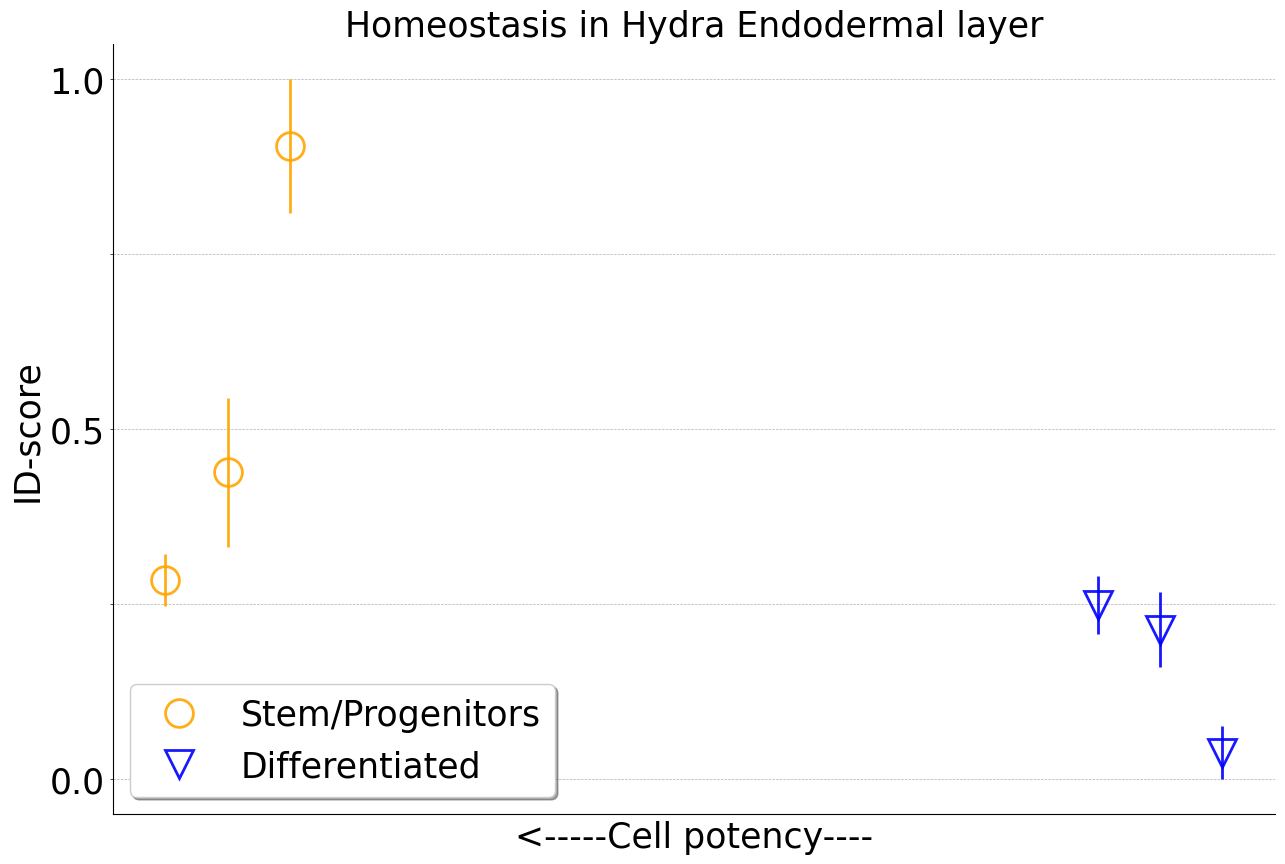

In [14]:
x = results_dict['Mean trend']['Labels']
y = results_dict['Mean trend']['Mean']
y_err = results_dict['Mean trend']['Std']

plot_params = {"label_size": 25, "markersize": 20,
                "linewidth": 4, "linestyle": ' ',
                "alpha": 0.9, "markeredgewidth": 2,
                "ticks_length": 2, "ticks_width": 0.5,
                "f_legend": 1}

fig, ax = plt.subplots(figsize = (15, 10))


title = 'Homeostasis in Hydra Endodermal layer'
celltype_group1 = np.array(['enEp_SC1', 'enEp_SC2', 'enEp_SC3'])
x_val = np.arange(1, len(celltype_group1)+1)
label = 'Stem/Progenitors'
plot_params['marker'] = 'o'
plot_params['color'] = 'orange'
Plot_figures.plot_lineage_trend(ax, x_val, x, y, y_err, label, 
                                celltype_group1, dataset_name, 
                                title = title, plot_params = plot_params)

lineage_shift = 15

celltype_group2 = np.array(['enEp_head', 'enEp_foot', 'enEp_tent'])
x_val = np.arange(1, len(celltype_group2)+1)+lineage_shift
label = 'Differentiated'
plot_params['marker'] = 'v'
plot_params['color'] = 'blue'
Plot_figures.plot_lineage_trend(ax, x_val, x, y, y_err, label, 
                                celltype_group2, dataset_name, 
                                title = title, plot_params = plot_params)

# Hydra ectodermal layer

The original dataset is available on GEO repository (GSE121617).

From the metadata they supply, we took the column named "Cluster" and renamed it *cell-type* in *adata.obs*. Cell-types beginning with 'ec_' belongs to ectodermal layer. We only considered cell-types represented by more than 400 cells, namely: 'ecEp_SC1', 'ecEp_SC2', 'ecEp-nem(id)', 'ecEp_head', 'ecEp_bd', 'ecEp_bat2(mp)', 'ecEp-nb(pd)'.

### Data download

In [15]:
dataset_name = "Hydra"
data_file_folder = '/home/niccolo/Desktop/Waddington ID/Codici/Hydra/Data/'

mtx, df, genes_name = Download_data.download_dataset(dataset_name,
                                                  data_file_folder, 
                                                  verbose = True)

Welcome to HYDRA dataset!
Metadata in a dataframe with shape (24984, 6)
scRNA-seq data in a counts matrix with shape ((24984, 37114))

Quality control on cells...
In order to follow the quality control of the paper:
 - cells with less than 200, or more than 8000 expressed genes were deleted (0
 - cells with size greater than 400 and smaller than 70000. 0 deleted.
 - cells with mitochondrial gene-expression fractions greater than 5.0% (0) were deleted

Genes selection...
Cannot select protein-coding genes because they are not available for Hydra in Ensembl database
Deleting genes because full of zeros

Normalization of the counts matrix...

scRNA-seq data in csr matrix with shape ((24984, 36814))
Metadata in a dataframe with columns ['cell', 'nGene', 'nUMI', 'origin_ident', 'celltype', 'GT']


### ID measure

In [16]:
labels = np.array(['ecEp_SC1', 'ecEp_SC2', 
                   'ecEp-nem(id)', 'ecEp_head', 
                   'ecEp_bd', 'ecEp_bat2(mp)', 
                   'ecEp-nb(pd)'])

In [17]:
selected_cts = np.array([ct for ct in df.celltype.values if ct in labels])
celltypes_dict = dict(collections.Counter(selected_cts))

celltypes_dict = dict(sorted(celltypes_dict.items(), key=lambda item: item[1]))
n_subsampled_cells = int(list(celltypes_dict.values())[0]*0.75)

print("Number of cells per cell-type:", celltypes_dict)
print("From each cell-type we will sub-sample", n_subsampled_cells, "cells")

Number of cells per cell-type: {'ecEp-nem(id)': 449, 'ecEp_bd': 452, 'ecEp_bat2(mp)': 608, 'ecEp_head': 695, 'ecEp-nb(pd)': 759, 'ecEp_SC2': 1145, 'ecEp_SC1': 1563}
From each cell-type we will sub-sample 336 cells


In [18]:
dataset_name = "Hydra"
labeling = "Celltype"
n_subsamplings = 3

results_dict = IDmeter.ID(dataset_name, labeling, 
                        labels, df, mtx, genes_name, 
                        n_subsamplings = n_subsamplings, 
                        verbose = False)

Settings:
Dataset Hydra
Celltype-based grouping of cells
Labels: ['ecEp_SC1' 'ecEp_SC2' 'ecEp-nem(id)' 'ecEp_head' 'ecEp_bd'
 'ecEp_bat2(mp)' 'ecEp-nb(pd)']
3 independent sub-samplings
Counts matrix dimension=(24984, 36814)


Subsampling number 1 , with seed: 364112. ecEp_SC1 ID = 25.8 - ecEp_SC2 ID = 16.5 - ecEp-nem(id) ID = 21.3 - ecEp_head ID = 20.3 - ecEp_bd ID = 15.8 - ecEp_bat2(mp) ID = 18.3 - ecEp-nb(pd) ID = 15.0 - 


Subsampling number 2 , with seed: 536449. ecEp_SC1 ID = 23.4 - ecEp_SC2 ID = 18.4 - ecEp-nem(id) ID = 19.5 - ecEp_head ID = 20.0 - ecEp_bd ID = 15.0 - ecEp_bat2(mp) ID = 16.9 - ecEp-nb(pd) ID = 17.7 - 


Subsampling number 3 , with seed: 198552. ecEp_SC1 ID = 24.2 - ecEp_SC2 ID = 19.3 - ecEp-nem(id) ID = 21.9 - ecEp_head ID = 19.3 - ecEp_bd ID = 16.6 - ecEp_bat2(mp) ID = 14.9 - ecEp-nb(pd) ID = 15.5 - 



### Plot

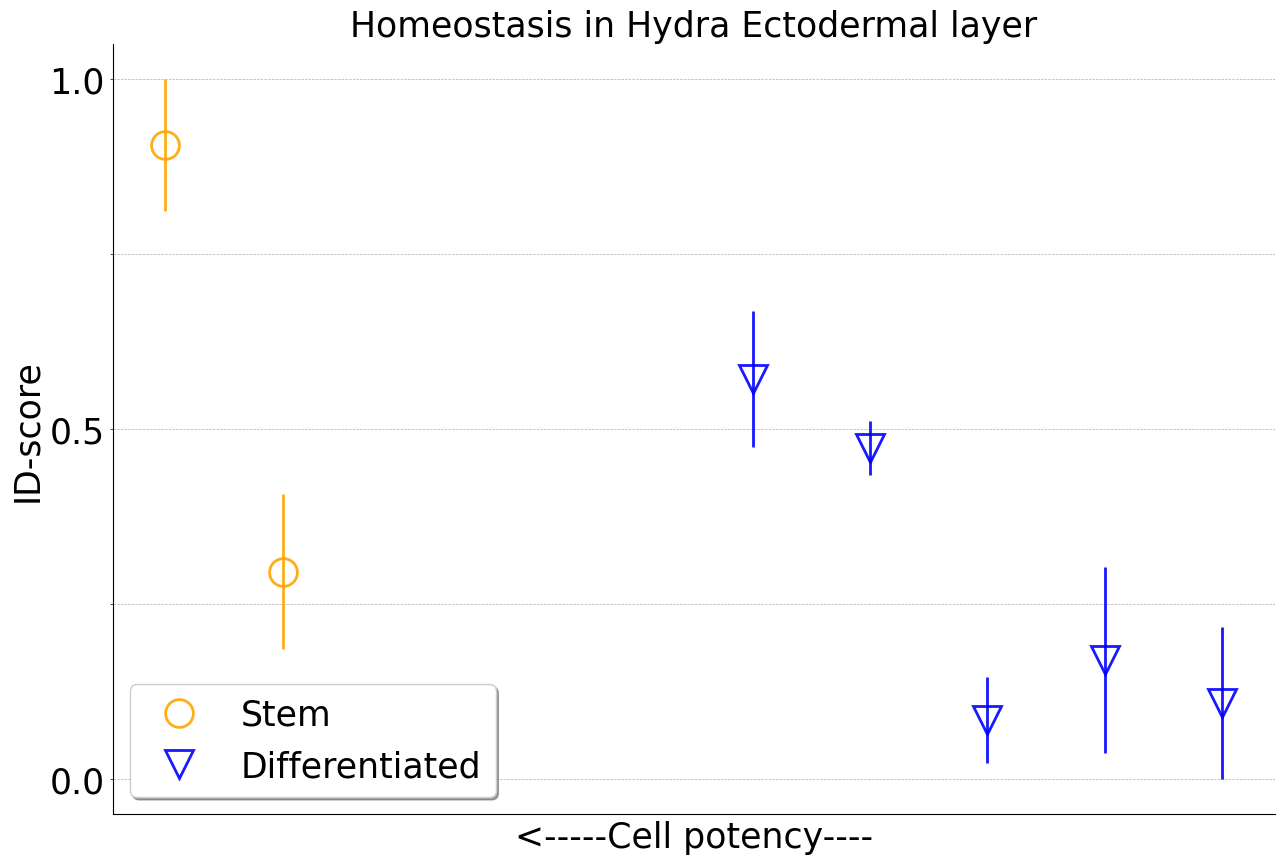

In [19]:
x = results_dict['Mean trend']['Labels']
y = results_dict['Mean trend']['Mean']
y_err = results_dict['Mean trend']['Std']

plot_params = {"label_size": 25, "markersize": 20,
                "linewidth": 4, "linestyle": ' ',
                "alpha": 0.9, "markeredgewidth": 2,
                "ticks_length": 2, "ticks_width": 0.5,
                "f_legend": 1}

fig, ax = plt.subplots(figsize = (15, 10))


title = 'Homeostasis in Hydra Ectodermal layer'
celltype_group1 = np.array(['ecEp_SC1', 'ecEp_SC2'])
x_val = np.arange(1, len(celltype_group1)+1)
label = 'Stem'
plot_params['marker'] = 'o'
plot_params['color'] = 'orange'
Plot_figures.plot_lineage_trend(ax, x_val, x, y, y_err, label, 
                                celltype_group1, dataset_name, 
                                title = title, plot_params = plot_params)

lineage_shift = 5

celltype_group2 = np.array(['ecEp-nem(id)', 'ecEp_head', 
                            'ecEp_bd', 'ecEp_bat2(mp)', 
                            'ecEp-nb(pd)'])
x_val = np.arange(1, len(celltype_group2)+1)+lineage_shift
label = 'Differentiated'
plot_params['marker'] = 'v'
plot_params['color'] = 'blue'
Plot_figures.plot_lineage_trend(ax, x_val, x, y, y_err, label, 
                                celltype_group2, dataset_name, 
                                title = title, plot_params = plot_params)